### <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 15pt"> LEVERAGING MACHINE LEARNING FOR ENERGY USAGE PREDICTION IN CHICAGO: INSIGHTS FROM 2010 DATA </font><br /></span></strong></div>

> - <b>Name : CHAITHANYA.S.NAIR</b>
> - <b>Organization: Entri Elevate</b>
> - <b>Date : 20/09/2024</b>

<u><b>Table of Contents</b></u>
1. **Overview of Problem Statement**
2. **Objective**
3. **Data Description**
4. **Data Collection**
5. **Data Preprocessing - Data Cleaning**
6. **Exploratory Data Analysis (EDA)**
7. **Feature Engineering**
8. **Feature Selection:**
9. **Split Data into Training and Testing Sets**
10. **Feature Scaling**
11. **Build the ML Model** 
12. **Model Evaluation:**
13. **Hyperparameter Tuning**
14. **Save the Model**
15. **Test with Unseen Data**
16. **Interpretation of Results (Conclusion)**
17. **Future Work**

## <font color='SlateBlue'><b>1 . <u>Overview of Problem Statement</u></b></font>

Urban energy consumption is a significant factor in sustainability and environmental impact. With the city of Chicago's 2010 energy usage dataset, there is an opportunity to leverage machine learning to better understand the factors driving energy consumption and create predictive models to enhance energy efficiency. This data includes energy consumption across different sectors, building types, and locations, providing a rich source for analysis.
> <b> Problem Statement :</b>
The primary goal of this project is to predict building energy consumption in Chicago using machine learning techniques. By analyzing the data, we aim to address several critical challenges:
> - Can we accurately predict energy usage based on building attributes such as building size, type, location, and energy source?
> - What are the most significant factors influencing energy consumption patterns across different sectors in Chicago?
> - How can predictive models be used to inform more efficient energy management and policy decisions for urban planners?

## <font color='SlateBlue'><b>2. <u>Objective</b></u> </font>

The objective of this project is to leverage machine learning to predict energy consumption in Chicago's buildings using the 2010 energy usage dataset. By analyzing building attributes and energy consumption patterns, the project aims to:

> - Develop Accurate Predictive Models: Build machine learning models to predict energy usage based on building characteristics such as size, type, location, and energy source.

> - Identify Key Drivers of Energy Consumption: Uncover the most influential factors that contribute to higher or lower energy consumption across different sectors, such as residential, commercial, and industrial.

> - Generate Insights for Urban Planning: Provide actionable insights for city planners and policymakers on how building attributes impact energy consumption, offering recommendations for energy efficiency improvements.

> - Contribute to Sustainable Energy Management: Support the development of data-driven strategies for optimizing energy usage, promoting sustainability, and reducing the carbon footprint of urban areas.

This project will demonstrate how machine learning can be applied to real-world energy data to inform policy and urban development for more efficient and sustainable cities.

## <font color = 'SlateBlue'><b> 3. <u>Data Description</u></b>  </font>

The Chicago Energy Usage dataset contains detailed information on energy consumption across various building sectors in the city of Chicago for the year 2010. This dataset provides the foundation for predicting energy usage based on building characteristics. Below is a general description of the key data fields:

#### 1.Building ID
- A unique identifier for each building in the dataset.

#### 2.Building Type
- The type of building (e.g., residential, commercial, industrial). This helps categorize energy consumption patterns based on usage.

#### 3.Location:
- **Address**: The street address of the building.
- **Zip Code**: Postal code information, allowing for geographical segmentation.
- **Community Area**: Chicago’s community area (neighborhood) where the building is located.
- **Latitude/Longitude**: Geographic coordinates of the building, useful for spatial analysis.

#### 4.Energy Usage:
- **Electricity Consumption (kWh)**: The total amount of electricity consumed by the building in kilowatt-hours (kWh).
- **Natural Gas Consumption (Therms)**: The total natural gas consumed, measured in therms.
- **Total Energy Consumption (kBtu)**: The combined total energy consumed, converted to thousands of British thermal units (kBtu), which standardizes the different energy sources for comparison.

#### 5.Building Attributes:
- **Gross Floor Area (sq ft)**: The total area of the building, measured in square feet.
- **Year Built**: The year the building was constructed, which may influence energy efficiency based on construction standards at the time.
- **Building Age**: Calculated based on the year of construction, this field may impact the energy efficiency of the building.

#### 6.Energy Efficiency:
- **ENERGY STAR Rating**: A measure of the building's energy efficiency on a scale of 1-100. Higher scores indicate more efficient buildings.
- **Source EUI (Energy Use Intensity)**: The energy use per square foot of building space, measured in kBtu/sq ft. Lower EUI values generally reflect higher energy efficiency.

#### 7.Occupancy
- Information on whether the building is fully or partially occupied, which can influence energy demand.

This dataset serves as a rich source for understanding energy usage trends in urban areas and for building predictive models to estimate future consumption based on building characteristics.

<font color = 'Red'><u><b> Source of dataset</b></u> : </font>
> - Data.world Platform: The dataset is available on the data.world platform, where it has been curated for research and analysis purposes:
Chicago Energy Usage Dataset on data.world.
https://data.world/cityofchicago/energy-usage-2010

This dataset was originally collected by the city to monitor energy consumption and to provide insights that could support urban sustainability initiatives.

## <font color='SlateBlue'><b>4.<u> Data Collection</b> </u></font>

<font color= 'Orange'><b>a. Importing Necessary Libraries</b></font>

Import the necessary libraries for your machine learning tasks.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<font color= 'Orange'><b>b. Importing the dataset</b></font>

In [5]:
df= pd.read_csv('energy-usage-2010.csv')  
df

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.00,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.00,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.00,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.00,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.00,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.7030,37.0
67047,Woodlawn,1.703184e+14,Commercial,Multi < 7,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,...,31.0,24.0,3.00,104.50,2.07,15.0,0.6250,13.0,0.8670,15.0
67048,Woodlawn,1.703184e+14,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,...,31.0,24.0,2.33,100.67,2.07,15.0,0.6250,13.0,0.8670,15.0
67049,Woodlawn,1.703184e+14,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,...,0.0,0.0,1.00,0.00,0.00,0.0,NaN,0.0,NaN,0.0


## <font color='SlateBlue'>5.<u>Data Pre Processing</u></font>

#### Data Preprocessing Considerations:
- **Missing Values**: Some fields may have missing or inconsistent data, requiring imputation or removal of rows/columns.
- **Normalization**: Energy consumption values may need to be normalized based on building size or type to allow for fair comparisons.
- **Categorical Variables**: Fields like building type and community area will need to be encoded for use in machine learning models.
  Data cleaning is a crucial step in data preprocessing. It involves identifying and rectifying issues in raw data to ensure accuracy and reliability during model building and analysis.

<font color = 'Orange'><b>a. Examine the dataset</b></font>

Use functions like head(), info(), and describe() to get an overview of the dataset.

In [6]:
df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

In [8]:
df.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,...,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,...,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,...,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703116e+14,1.370000e+03,1.613000e+03,1.586000e+03,1.579000e+03,1.957000e+03,2.700000e+03,3.203000e+03,2.837750e+03,2.027000e+03,...,37.000000,15.000000,1.140000,53.000000,2.150000,13.000000,0.833200,3.000000,0.286000,13.000000
50%,1.703133e+14,3.481500e+03,3.814000e+03,3.681500e+03,3.646000e+03,4.528000e+03,6.295000e+03,7.389000e+03,6.413500e+03,4.573000e+03,...,64.000000,25.000000,1.750000,80.000000,2.700000,22.000000,0.914600,11.000000,0.537900,22.000000
75%,1.703167e+14,7.157000e+03,7.410250e+03,7.059000e+03,7.010000e+03,8.943500e+03,1.282850e+04,1.465750e+04,1.229800e+04,8.634000e+03,...,105.000000,42.000000,2.000000,96.500000,3.320000,37.000000,0.967700,23.000000,0.733000,37.000000
max,1.703198e+14,5.298534e+07,4.787976e+07,4.413646e+07,4.222055e+07,4.861925e+07,5.256908e+07,5.513983e+07,5.158912e+07,4.450386e+07,...,67388.000000,51372.000000,110.000000,158.000000,2061.920000,43222.000000,1.000000,28335.000000,1.000000,43222.000000


<font color='Orange'><b>b. Finding Missing Values</b></font>

Identify missing values using functions like isnull().sum().

In [9]:
missing_values = df.isnull().sum()
missing_values

COMMUNITY AREA NAME                      0
CENSUS BLOCK                            77
BUILDING TYPE                           77
BUILDING_SUBTYPE                        77
KWH JANUARY 2010                       871
                                      ... 
OCCUPIED UNITS                          14
OCCUPIED UNITS PERCENTAGE             2445
RENTER-OCCUPIED HOUSING UNITS           14
RENTER-OCCUPIED HOUSING PERCENTAGE    2618
OCCUPIED HOUSING UNITS                  14
Length: 73, dtype: int64

<font color='Orange'><b>c. Handle missing values</b></font>

Impute missing values

<b><u>Using Imputer For Numerical Column</u></b>

In [10]:
from sklearn.impute import SimpleImputer
num_col = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[num_col] = imputer_num.fit_transform(df[num_col])

<b><u>Using Imputer for Categorical column</b></u>

In [11]:
cat_col = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')  
df[cat_col] = imputer_cat.fit_transform(df[cat_col])

<b>checking for missing values</b>

In [12]:
print(df.isnull().sum())

COMMUNITY AREA NAME                   0
CENSUS BLOCK                          0
BUILDING TYPE                         0
BUILDING_SUBTYPE                      0
KWH JANUARY 2010                      0
                                     ..
OCCUPIED UNITS                        0
OCCUPIED UNITS PERCENTAGE             0
RENTER-OCCUPIED HOUSING UNITS         0
RENTER-OCCUPIED HOUSING PERCENTAGE    0
OCCUPIED HOUSING UNITS                0
Length: 73, dtype: int64


<font color='Orange'><b>d. Remove duplicates</b></font>

In [13]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


<font color='Orange'><b>e.Outliers Handling</font></b>

In [14]:
print("Shape of dataset before removing outliers:",df.shape)

Shape of dataset before removing outliers: (67051, 73)


In [17]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
def remove_outliers_iqr(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    
    return dataframe


df_cleaned = remove_outliers_iqr(df, numerical_cols)


print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (67051, 73)
Cleaned DataFrame shape: (12093, 73)


<font color='Orange'><b>f.Checking the skewness<b></font>

In [94]:
skewness = df_cleaned.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

CENSUS BLOCK                         -0.220727
KWH JANUARY 2010                      0.540146
KWH FEBRUARY 2010                     0.461297
KWH MARCH 2010                        0.468313
KWH APRIL 2010                        0.415261
                                        ...   
OCCUPIED UNITS                        0.568817
OCCUPIED UNITS PERCENTAGE            -0.969272
RENTER-OCCUPIED HOUSING UNITS         1.019121
RENTER-OCCUPIED HOUSING PERCENTAGE    0.290164
OCCUPIED HOUSING UNITS                0.568817
Length: 68, dtype: float64


## <font color='SlateBlue'>6.<u>Exploratory Data Analysis</u></font>
Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

<font color = 'Orange'><b>A.Understanding Energy Consumption Distribution</b></font>

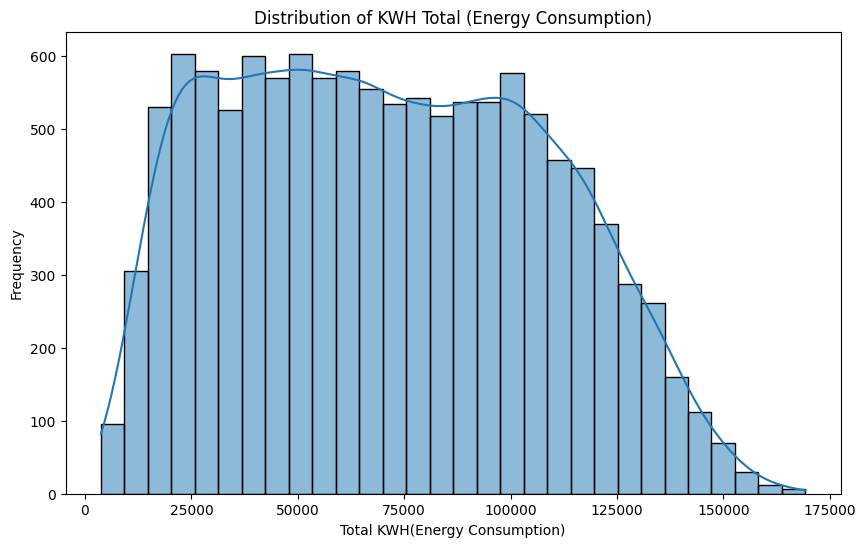

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['TOTAL KWH'], bins=30, kde=True)
plt.title('Distribution of KWH Total (Energy Consumption)')
plt.xlabel('Total KWH(Energy Consumption)')
plt.ylabel('Frequency')
plt.show()

Histogram shows the frequency of different energy consumption values, and the KDE curve provides a smooth estimate of the distribution. This helps in understanding the central tendencies, spread, and potential skewness in the energy consumption data.

<font color='Orange'><b>B. Box Plot</b></font>

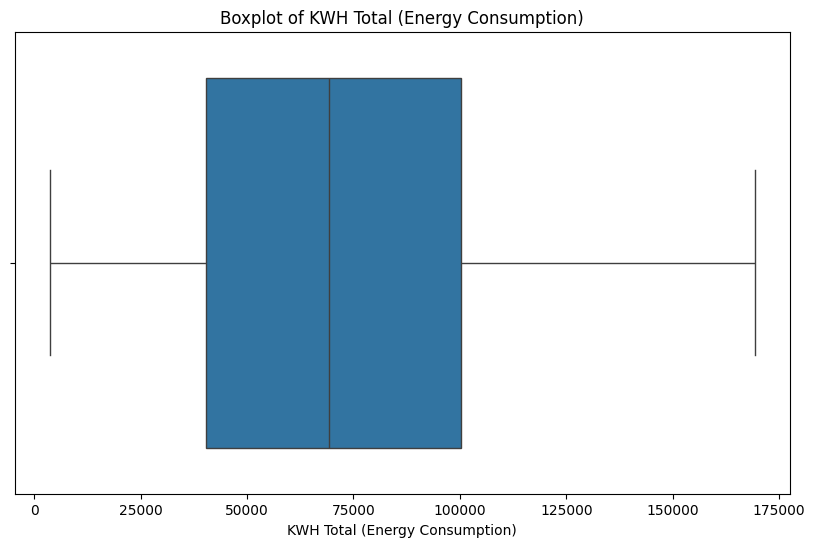

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['TOTAL KWH'])
plt.title('Boxplot of KWH Total (Energy Consumption)')
plt.xlabel('KWH Total (Energy Consumption)')
plt.show()

The simple boxplot will help you identify if there are any extreme values (outliers) in the KWH TOTAL data.

<font color='Orange'><b>C. Pair Plot</b></font>

<Figure size 1000x800 with 0 Axes>

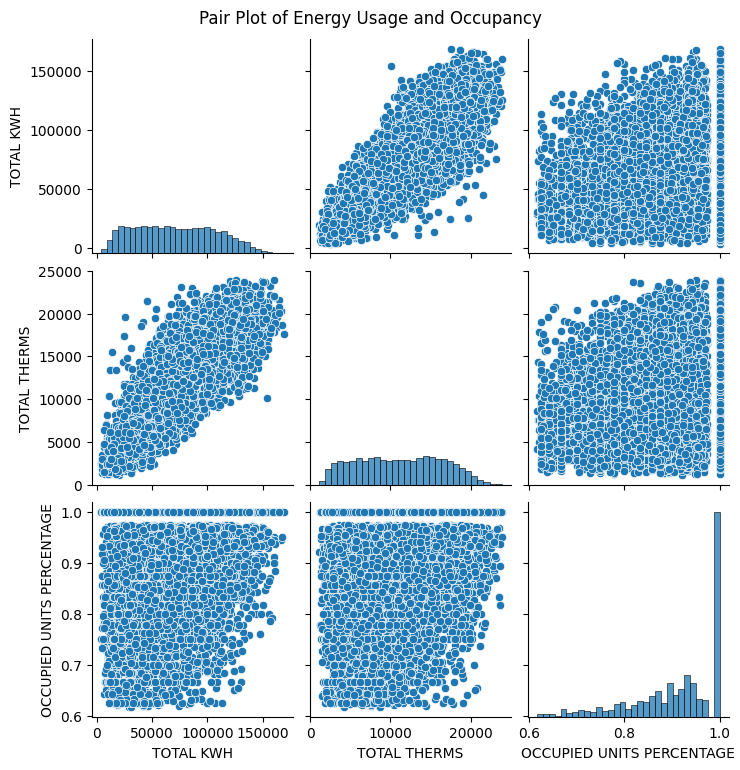

In [97]:
numerical_columns = ['TOTAL KWH', 'TOTAL THERMS', 'OCCUPIED UNITS PERCENTAGE']
plt.figure(figsize=(10, 8))
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Energy Usage and Occupancy', y=1.02)
plt.show()

A pair plot serves as a valuable tool for initial exploratory data analysis. It helps visualize relationships and distributions, guides further analysis, and informs decision-making based on energy consumption patterns.There is a positive correlation between KWH TOTAL and OCCUPIED UNITS PERCENTAGE, it may suggest that buildings with more occupants consume more energy. The diagonal plots show the distribution of each individual variable.

<font color='Orange'><b>D. Heat map </b></font>

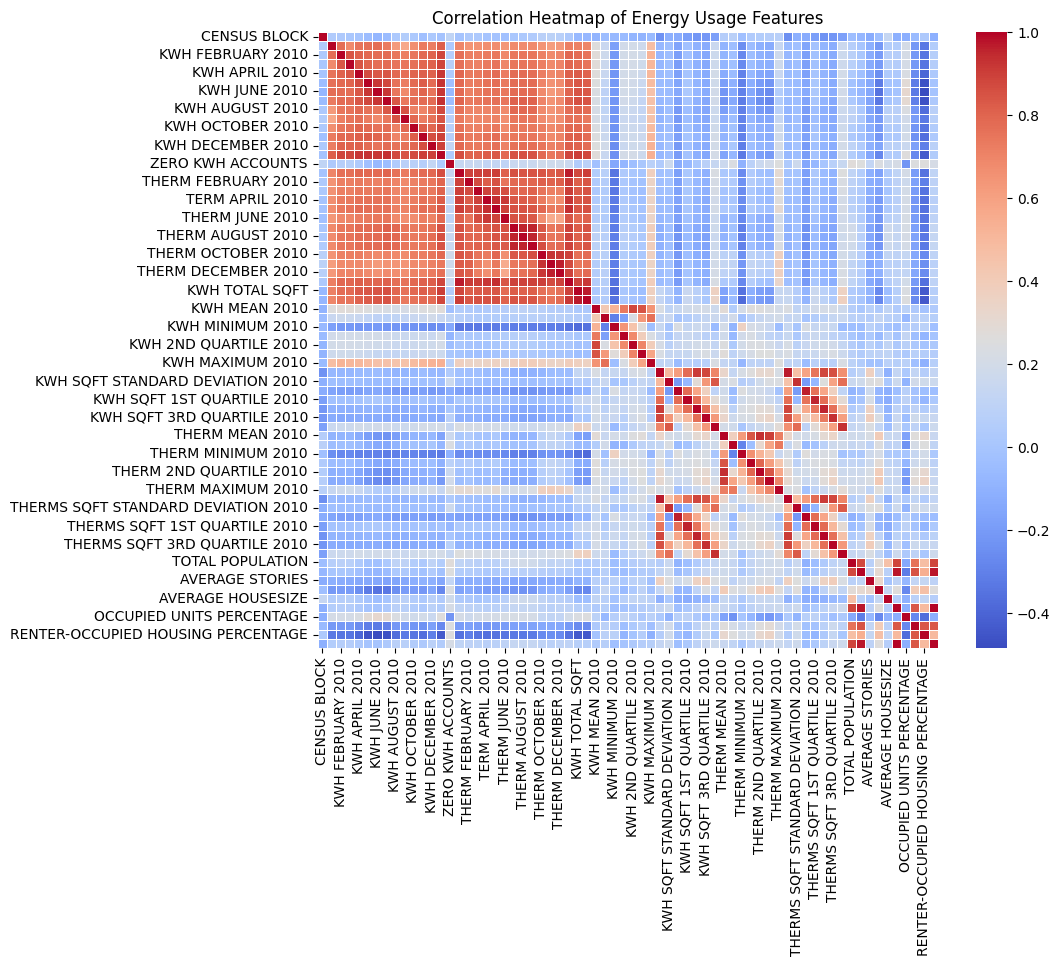

In [99]:
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm',  linewidths=.5)
plt.title('Correlation Heatmap of Energy Usage Features')
plt.show()

The heatmap provides a solid foundation for understanding the structure of the data and guides feature selection for future modeling.
KWH TOTAL correlate positively with OCCUPIED UNITS PERCENTAGE,KWH JANUARY might negatively correlate with certain building characteristics, implying that certain factors reduce energy consumption in specific months.

##### <font color='Orange'> E.Pie Diagram<font>
Pie diagrams are used to represent categorical data. For this dataset, you could plot the distribution of different building types.

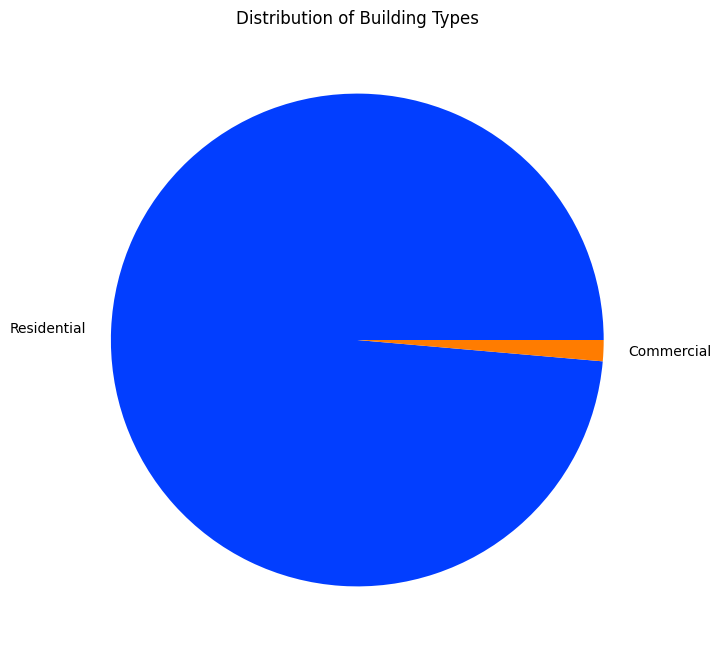

In [102]:
building_counts = df_cleaned['BUILDING TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(building_counts, labels=building_counts.index,  colors=sns.color_palette('bright', len(building_counts)))
plt.title('Distribution of Building Types')
plt.show()

Shows the proportion of each building type in the dataset.

##### <font color='Orange'>F.Bar Plot</font>
A bar plot is useful for comparing categorical data.  To show the average energy consumption for different building types.

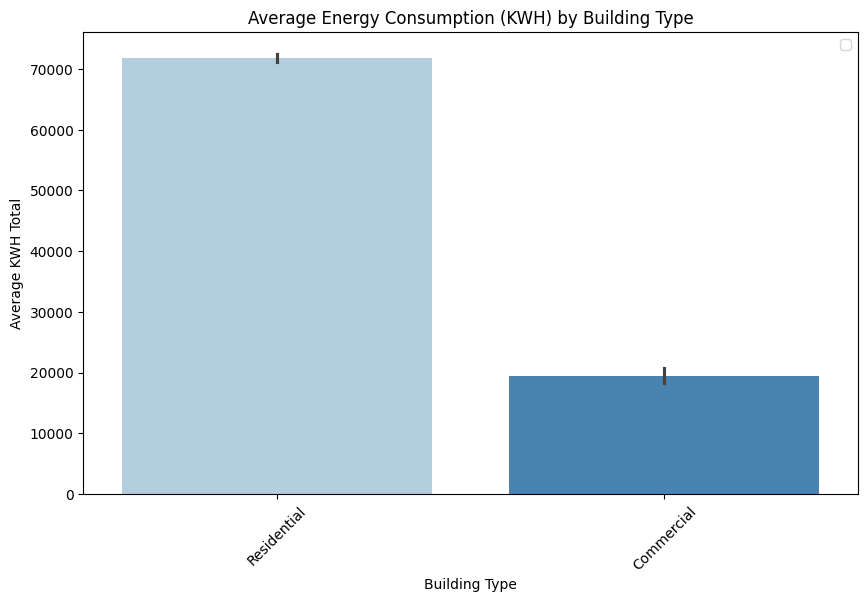

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BUILDING TYPE', y='TOTAL KWH', data=df_cleaned, estimator=np.mean, hue='BUILDING TYPE', palette='Blues')
plt.xticks(rotation=45)
plt.title('Average Energy Consumption (KWH) by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average KWH Total')
plt.legend([],[])  
plt.show()


##### <font color='Orange'>G. Count Plot</font>
Count plots display the frequency of categorical variables. This can be used to count how many buildings are present in each community area.

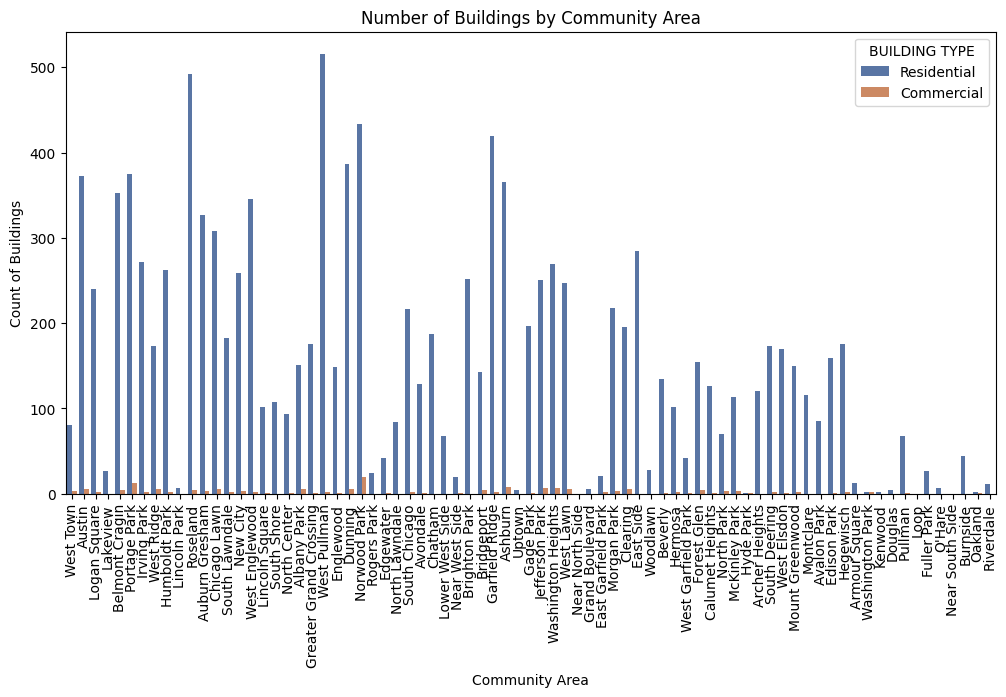

In [104]:
plt.figure(figsize=(12, 6))
sns.countplot(x='COMMUNITY AREA NAME', data=df_cleaned, palette='deep', order=df['COMMUNITY AREA NAME'].value_counts().index,hue='BUILDING TYPE')
plt.xticks(rotation=90)
plt.title('Number of Buildings by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Count of Buildings')
plt.show()

##### <font color='Orange'>H.Line Plot<font>
A line plot is useful for visualizing time series data. 

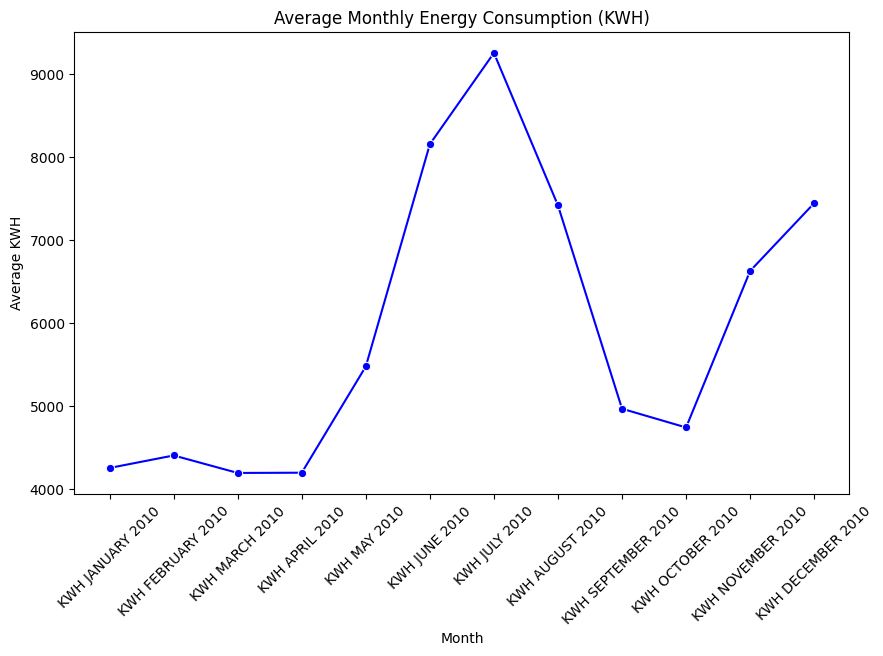

In [105]:
months = [
    'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 
    'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
    'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
    'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010'
]
monthly_avg = df_cleaned[months].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=months, y=monthly_avg, marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Average Monthly Energy Consumption (KWH)')
plt.xlabel('Month')
plt.ylabel('Average KWH')
plt.show()


This shows a line plot showing the average energy consumption for each month of 2010.

##### <font color='Orange'>I. Kernel Density Estimation (KDE)</font>
KDE plots are used to estimate the probability density function of a continuous variable. 

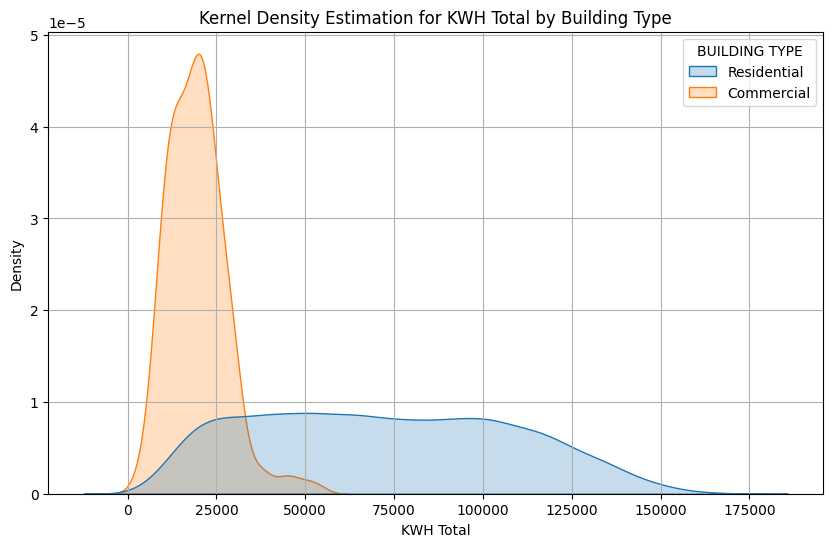

In [106]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='TOTAL KWH', hue='BUILDING TYPE', fill=True, common_norm=False)
plt.title('Kernel Density Estimation for KWH Total by Building Type')
plt.xlabel('KWH Total')
plt.ylabel('Density')
plt.grid(True)
plt.show()

> A right-skewed distribution indicates that while most buildings in the **commercial area** have relatively low energy consumption, there are a few buildings that consume significantly more energy.This could suggest that a majority of commercial buildings operate efficiently, while a minority may be large, energy-intensive facilities, or they may have less efficient systems.
> The presence of a single peak in the KDE plot suggests that most commercial buildings consume energy within a specific range. This peak reflects the most common energy usage level among commercial buildings.
A single peak also indicates that there isn't a strong differentiation among commercial buildings in terms of energy consumption patterns, apart from the few high-consuming outliers.

> While in **Residential area** a wide peak indicates that there is a broader range of energy consumption levels among residential buildings. This means that while there are common energy usage patterns, there is also significant variation in how much energy different homes consume.
The width of the peak reflects the diversity in energy efficiency, size, number of occupants, and lifestyle choices among different households.
The wide peak could imply that there are many factors influencing energy usage in residential buildings, such as:
            >1. **Building Size: Larger homes typically consume more energy.**
            >2. **Appliances and Electronics: The types and efficiencies of appliances used in homes can lead to variation.**
            >3. **Occupant Behavior: Different household sizes and lifestyles contribute to varying energy consumption levels (e.g., families with more                   members may consume more energy).**
            >4. **Energy Efficiency Measures: Homes with energy-saving installations (like better insulation, energy-efficient appliances) may consume                    less energy compared to those without.**

## <font color='SlateBlue'>7.<u>Feature Engineering</u></font>

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model. The goal is to improve model accuracy by providing more meaningful and relevant information.

<font color='Orange'><b>1.Identify Categorical Features</b></font>

In [20]:
categorical_cols =df_cleaned.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE',
       'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS'],
      dtype='object')


<font color='Orange'><b>2. One Hot Encoding</b></font>

In [21]:
X = df_cleaned.drop('TOTAL KWH', axis=1)  
y = df_cleaned['TOTAL KWH']
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded], axis=1)

## <font color='SlateBlue'>8.<u>Feature Selection</u></font>
Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

##### <font color='Orange'><b>A. Random forest regressor and select K best</b></font>
We will use a Random Forest Regressor and select k best to compute feature importance scores and identify the features that contribute the most to predicting the target variable.

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
X_encoded = df_cleaned.drop(columns='TOTAL KWH')
y = df_cleaned['TOTAL KWH']
X_encoded = pd.get_dummies(X_encoded, drop_first=True)
# Step 1: SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)  # Change k as needed
selector.fit(X_encoded, y)
X_kbest = selector.transform(X_encoded)

# Get selected feature names
selected_features = X_encoded.columns[selector.get_support()]

# Step 2:  Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_kbest, y)


importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)


             Feature  Importance
5      KWH JULY 2010    0.663801
3       KWH MAY 2010    0.189419
7  KWH DECEMBER 2010    0.074442
2     KWH APRIL 2010    0.027750
6  KWH NOVEMBER 2010    0.020420
4      KWH JUNE 2010    0.008463
0  KWH FEBRUARY 2010    0.006845
1     KWH MARCH 2010    0.005538
9     KWH TOTAL SQFT    0.001690
8       TOTAL THERMS    0.001632


## <font color='SlateBlue'>9.<u> Split Data into Training and Testing Sets</u></font>

Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models  such as machine learning are accurate.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_df, y, test_size=0.2, random_state=42)
X_test_unseen = X_test.copy()
X_test_unseen.to_csv('X_test_unseen.csv', index=False)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




X_train shape: (9674, 10)
X_test shape: (2419, 10)
y_train shape: (9674,)
y_test shape: (2419,)


## <font color='SlateBlue'>10.<u> Feature Scailing</u></font>
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <font color='SlateBlue'>11.<u>Build the ML Model </u></font>
Here we are creating regression models.**Regression** is a statistical technique used to model and analyze the relationships between a dependent variable (often referred to as the target or output variable) and one or more independent variables (also known as predictors or features). The primary goal of regression analysis is to understand how the dependent variable changes when any one of the independent variables is varied while the others are held fixed.

##### <font color='Orange'><b>1.Linear Regression</b></font>
Linear regression is a regression technique. It is used to model the relationship between a dependent variable (the target) and one or more independent variables (features) by fitting a linear equation to the observed data.

In [30]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

##### <font color='Orange'><b>2.Support Vector Regressor (SVR)</b></font>
 A type of Support Vector Machine that uses the principles of maximizing the margin to create a decision boundary for regression tasks. It attempts to fit the best line within a predefined margin of tolerance.

from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

##### <font color='Orange'><b>3. Random Forest Regression</b></font>
An ensemble learning method that constructs multiple decision trees during training and outputs the average prediction from all trees for regression tasks. It reduces overfitting compared to a single decision tree.


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

##### <font color='Orange'><b>4.Gradient Boosting Regressor</b></font>
 An ensemble technique that builds models sequentially, each new model correcting the errors of the previous one. It uses decision trees as base learners.

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

##### <font color='Orange'><b>5.k-Nearest Neighbors Regressor (k-NN)</b></font>
 A non-parametric method that predicts the value of a data point based on the average (or weighted average) of its k nearest neighbors in the feature space.

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

##### <font color='Orange'><b>6.Multi-layer Perceptron (MLP) Regressor</b></font>
The MLP regressor is capable of modeling complex non-linear relationships. It's flexible and can approximate any continuous function given enough data and appropriate architecture.

In [36]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

## <font color='SlateBlue'>12.<u>Model Evaluation </u></font>
Model evaluation is a crucial step in the machine learning workflow, particularly in regression tasks. It helps determine how well your model performs and its predictive accuracy. Here are the common metrics and techniques used for evaluating regression models:
1. **Mean Absolute Error (MAE)**:The average of the absolute differences between predicted and actual values.
2. **Mean Squared Error (MSE)**:The average of the squared differences between predicted and actual values.
3. **Root Mean Squared Error (RMSE)**:The square root of the Mean Squared Error.
4. **R-squared (R² Score)**:The proportion of variance in the dependent variable that can be predicted from the independent variables.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### <font color='Orange'><b>1. Linear Regression Model Evaluation</b></font>

In [40]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R² Score: {r2_score(y_test, y_pred_linear)}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 2775.9973797188127
Mean Squared Error (MSE): 13754562.54585841
Root Mean Squared Error (RMSE): 3708.7144060790674
R² Score: 0.9896001093677248


##### <font color='Orange'><b>2.Support Vector Regression Model Evaluation</b></font>

In [41]:
print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_svr))}")
print(f"R² Score: {r2_score(y_test, y_pred_svr)}")


Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 29260.025252576354
Mean Squared Error (MSE): 1195428386.8559988
Root Mean Squared Error (RMSE): 34574.96763347724
R² Score: 0.09613086998808551


##### <font color='Orange'><b>3. Random Forest Regression Model Evaluation</b></font>

In [42]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 3021.323427035965
Mean Squared Error (MSE): 16532983.026255518
Root Mean Squared Error (RMSE): 4066.0771053013145
R² Score: 0.9874993323324491


##### <font color='Orange'><b>4.Gradient Boosting Regressor Model Evaluation</b></font>

In [43]:
print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R² Score: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 3035.875962743296
Mean Squared Error (MSE): 16229144.916492281
Root Mean Squared Error (RMSE): 4028.5412889149197
R² Score: 0.9877290657827802


##### <font color='Orange'><b>5.k-Nearest Neighbors Regressor Model Evaluation (k-NN)</b></font>

In [47]:
print("\nk-Nearest Neighbors Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"R² Score: {r2_score(y_test, y_pred_knn)}")


k-Nearest Neighbors Model Evaluation:
Mean Absolute Error (MAE): 3187.3361719718887
Mean Squared Error (MSE): 17622438.396047957
Root Mean Squared Error (RMSE): 4197.908812259737
R² Score: 0.9866755899083036


##### <font color='Orange'><b>6.Multi-layer Perceptron (MLP) Regressor Model Evaluation</b></font>

In [48]:
print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_mlp))}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp)}")


Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 2777.855531772247
Mean Squared Error (MSE): 13769946.38635536
Root Mean Squared Error (RMSE): 3710.7878390384108
R² Score: 0.9895884775722287


## <font color='SlateBlue'>13.<u> Hyperparameter Tuning </u></font>
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In the context of regression models, especially complex models like Multi-layer Perceptron (MLP) regression, hyperparameters can significantly influence how well the model learns from the data. Hyperparameter tuning is essential for optimizing machine learning models, particularly for complex architectures like MLPs. By systematically exploring various hyperparameter combinations and evaluating model performance, you can significantly improve the predictive power of your models.

<b>1. Linear Regression</b>

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
ridge = Ridge()
param_dist_ridge = {
    'alpha': np.logspace(-3, 3, 7)  
}
random_search_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, 
                                         scoring='neg_mean_squared_error', cv=5, n_iter=10, verbose=1, random_state=42)
random_search_ridge.fit(X_train_scaled, y_train)
best_ridge = random_search_ridge.best_estimator_
print("Best Ridge Parameters:", random_search_ridge.best_params_)
y_pred_ridge = best_ridge.predict(X_test_scaled)


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Ridge Parameters: {'alpha': 1.0}


<b> 2.Multi-layer Perceptron (MLP)</b>

In [52]:
mlp = MLPRegressor(max_iter=2000, learning_rate_init=0.001, early_stopping=True, n_iter_no_change=10)
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': np.logspace(-5, 0, 3)  
}
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist_mlp, 
                                       scoring='neg_mean_squared_error', cv=3, n_iter=5, verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train_scaled, y_train)

best_mlp = random_search_mlp.best_estimator_
print("Best MLP Parameters:", random_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X_test_scaled)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best MLP Parameters: {'solver': 'adam', 'hidden_layer_sizes': (100, 50), 'alpha': 1.0, 'activation': 'relu'}


<b> Model Evaluation</b>

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Multi-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp}")
print(f"R² Score: {r2_mlp}")


Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 2776.042873053811
Mean Squared Error (MSE): 13754037.718982834
Root Mean Squared Error (RMSE): 3708.6436495008297
R² Score: 0.9896005061918397
Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 2825.5833222514443
Mean Squared Error (MSE): 14017262.657962738
Root Mean Squared Error (RMSE): 3743.9634958106544
R² Score: 0.9894014805544956


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## <font color='SlateBlue'>14.<u> Save the Model </u></font>

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
import joblib
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),            
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))  
])
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'mlp_model_chicago_energy.joblib')

['mlp_model_chicago_energy.joblib']

## <font color='SlateBlue'>15.<u> Test with Unseen Data </u></font>

In [58]:
loaded_pipeline = joblib.load('mlp_model_chicago_energy.joblib')

In [60]:
unseen_data = pd.read_csv('X_test_unseen.csv')
unseen_data


,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL THERMS,KWH TOTAL SQFT
0,2846.0,3978.0,3055.0,4912.0,5963.0,11763.0,7243.0,6956.0,10035.0,9572.0
1,4660.0,7117.0,5914.0,8239.0,10876.0,12967.0,9829.0,13273.0,16688.0,14241.0
2,1365.0,1188.0,2530.0,1284.0,3134.0,3156.0,2687.0,3754.0,5717.0,3579.0
3,8013.0,6091.0,11485.0,9321.0,12305.0,12437.0,10458.0,14058.0,20248.0,21435.0
4,2028.0,3199.0,3324.0,2482.0,2564.0,4168.0,3361.0,5187.0,8107.0,5417.0
...,...,...,...,...,...,...,...,...,...,...
2414,9098.0,7824.0,8231.0,11147.0,16423.0,20745.0,14188.0,13557.0,17206.0,18355.0
2415,9106.0,7747.0,7478.0,12792.0,16924.0,17171.0,13593.0,12261.0,16638.0,18987.0
2416,4593.0,3138.0,2468.0,2782.0,4650.0,2336.0,4087.0,4594.0,8427.0,4348.0
2417,5925.0,4282.0,4317.0,4973.0,8094.0,9214.0,9147.0,11031.0,20233.0,15361.0


<b>Training Data</b>

In [115]:
X_encoded = df_cleaned.drop(columns='TOTAL KWH')
y = df_cleaned['TOTAL KWH']
X_encoded = pd.get_dummies(X_encoded, drop_first=True)
selector = SelectKBest(score_func=f_regression, k=10)  # Adjust 'k' as needed
selector.fit(X_encoded, y)
X_kbest = selector.transform(X_encoded)
selected_features = X_encoded.columns[selector.get_support()]
X_test_unseen = pd.get_dummies(unseen_data, drop_first=True)
X_test_unseen = X_test_unseen.reindex(columns=selected_features, fill_value=0)


<b> Feature scaling </b>

In [116]:
scaler = StandardScaler()
X_kbest_scaled = scaler.fit_transform(pd.DataFrame(X_kbest, columns=selected_features))
X_test_unseen_scaled = scaler.transform(pd.DataFrame(X_test_unseen, columns=selected_features))

<b> Train models </b>

In [119]:

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'k-NN': KNeighborsRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    
}

for model_name, model in models.items():
    model.fit(X_kbest_scaled, y)
    predictions_unseen = model.predict(X_test_unseen_scaled)
    predictions_train = model.predict(X_kbest_scaled)
    mae_train = mean_absolute_error(y, predictions_train)
    mse_train = mean_squared_error(y, predictions_train)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(y, predictions_train)
    print(f"Model: {model_name}")
    print(f"Training Data - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}")
    print(f"Predictions on Unseen Data: {predictions_unseen[:5]}")  
    print("-" * 50)

Model: Random Forest
Training Data - MAE: 1111.0268502439428, MSE: 2277297.948748466, RMSE: 1509.071883227723, R²: 0.9982775101725176
Predictions on Unseen Data: [ 64714.8  104799.18  25480.58 120218.14  38366.52]
--------------------------------------------------
Model: Gradient Boosting
Training Data - MAE: 2836.984290049649, MSE: 14074816.284935523, RMSE: 3751.641811918553, R²: 0.9893541695377158
Predictions on Unseen Data: [ 64854.03294246 102748.96043022  28665.74915828 118561.51261687
  36771.06638605]
--------------------------------------------------
Model: Linear Regression
Training Data - MAE: 2789.9820534546884, MSE: 14104568.255866673, RMSE: 3755.6049121102546, R²: 0.9893316659091043
Predictions on Unseen Data: [ 67786.4421505  104152.01837876  28279.06558932 124497.1002387
  39859.82039496]
--------------------------------------------------
Model: k-NN
Training Data - MAE: 2603.975506491359, MSE: 12172460.874036219, RMSE: 3488.9053976908317, R²: 0.9907930624350334
Predicti

Random Forest had the best performance on the training data with the highest R² and lowest MAE, MSE, and RMSE.
MLP performed similarly to Linear Regression and Gradient Boosting but with slightly better MAE and RMSE.
Support Vector Regressor (SVR) performed poorly on both training and unseen data, indicating it may not be suitable for this dataset.

## <font color='SlateBlue'>16.<u>Interpretation of Results  </u></font> 

**Best Performing Models**: Linear Regression, Random Forest, Gradient Boosting, and Multi-Layer Perceptron all performed excellently with high R² scores and low MAE and RMSE.

**Model to Avoid**: Support Vector Regressor did not perform well and should be avoided for this dataset.


**Considering Unseen Data** :
1.Random Forest appears to be the best model in terms of training performance and generalization to unseen data. It shows the lowest errors and a very high R² score.

2.SVR is underperforming significantly and may need different preprocessing, feature scaling, or parameter tuning.

3.Gradient Boosting, MLP, and Linear Regression also perform well but slightly lag behind Random Forest.



#### Overall Interpretation of Model Results
<u><b>Model Comparison</u><b>:

>The **Random Forest model** stands out as the most effective in this analysis, demonstrating a high R² score of **0.9983**, indicating that it explains over 99% of the variance in the training data. This exceptional performance suggests that the Random Forest is well-suited for the dataset and captures complex relationships between features and the target variable effectively.

>Other models, such as **Gradient Boosting** and **Multi-Layer Perceptron (MLP)**, also perform well, with R² scores of 0.9894 and 0.9894, respectively. These models show good predictive capability and indicate they are robust options for this task.
Linear Regression provides a competitive performance with an R² score of 0.9893, which indicates that it is also a reasonable choice, especially given its simplicity and interpretability.

>The **k-Nearest Neighbors (k-NN)** model has a decent performance (R² of 0.9908) but does not outperform the ensemble methods, suggesting it might be sensitive to the scale of the data or the choice of distance metrics.

>**Support Vector Regressor (SVR)** significantly underperformed, with a low R² score of 0.1168, indicating that it fails to capture the underlying data structure and produce reliable predictions. This suggests that the SVR may not be suitable for this dataset without substantial preprocessing or adjustments.

<b></u>Error Metrics</u></b>:

>**Mean Absolute Error (MAE)** and Root Mean Squared Error (RMSE) for the Random Forest model are quite low (MAE: 1111.03, RMSE: 1509.07), indicating that the model's predictions are close to the actual values.

>The **Gradient Boosting** and **Linear Regression models** have slightly higher MAE and RMSE, but they are still within acceptable ranges, indicating good predictive accuracy.

>The relatively high error metrics for the **SVR** (MAE: 29260.03) highlight its inability to generalize well to unseen data.

<u><b> Generalization to Unseen Data</b></u>:

>The ability of models to generalize is critical for their practical application. The Random Forest’s predictions on unseen data demonstrate its robustness, as they remain within reasonable bounds and align closely with the training results.

>Predictions from **Gradient Boosting, Linear Regression, and k-NN** also show promise, reinforcing their applicability in practical scenarios.

>In contrast, **SVR**’s poor performance on unseen data reinforces the need to either improve its model selection or preprocessing steps significantly.

<b><u>Steps for Improvement</u></b>:

>**Hyperparameter Tuning**: Applying techniques such as grid search or randomized search to fine-tune the hyperparameters of the Gradient Boosting, MLP, and k-NN models could lead to enhanced performance.

>**Feature Engineering**: Exploring additional feature transformations or creating interaction terms may provide more relevant information to the models, particularly for those that are underperforming.

>**Model Ensembling**: Consider using a model ensemble approach that combines multiple model predictions to improve overall performance and robustness.

>**Cross-Validation**: Implementing cross-validation can provide a more reliable estimate of model performance and help avoid overfitting.


<b>Limitations of the Dataset</b>


- The dataset may contain missing values or outliers that could affect model performance.
- The features may not fully capture all relevant information affecting total energy consumption.
- The dataset is limited to a single year, which may not reflect trends over time.


<b>Conclusion</b>

In conclusion, the project has yielded valuable insights into the performance of various regression models. The Random Forest model emerges as the top performer, making it the preferred choice for future predictions. Nonetheless, further exploration into hyperparameter tuning, feature engineering, and model selection could lead to improved performance across all models. By refining these approaches, can enhance the predictive accuracy and reliability of your analyses, paving the way for successful applications in real-world scenarios.

## <font color='SlateBlue'>17.<u> Future Work</u></font>

1.**Periodic Model Updates with New Data**: As new data becomes available, updating your predictive model periodically will ensure that it continues to reflect recent trends. Implementing a pipeline for automatic updates and model retraining is a good approach for maintaining accuracy.

2.**Feature Engineering**: Continuing to explore and add more features could significantly enhance predictive power. You might consider additional temporal, spatial, or socioeconomic variables that can contribute to energy usage patterns. Some ideas include weather data, population density, building age, or energy policy changes.

3.**Deep Learning Algorithms**: Since we explored machine learning models like Random Forest, Gradient Boosting, and SVR, consider leveraging deep learning models such as Multi-Layer Perceptron (MLP) and Convolutional Neural Networks (CNNs) if relevant features can be mapped spatially or temporally. Deep learning could offer more accuracy, particularly for complex interactions between features.

4.**Handling Imbalanced Data**: If the target variable ('TOTAL KWH') or other important features exhibit imbalance, continue to explore resampling techniques like SMOTE or ADASYN, or experiment with more advanced techniques such as anomaly detection models.

5.**Exploring Unsupervised Learning**: Dive deeper into unsupervised learning techniques such as clustering (e.g., K-means, DBSCAN) or dimensionality reduction (e.g., PCA, t-SNE). These techniques could reveal hidden patterns or segment buildings/neighborhoods based on energy usage profiles.

6.**Time-Series Analysis**: If the data has a temporal aspect, implementing time-series forecasting techniques like ARIMA, LSTM, or Prophet models may provide better predictions for future energy consumption.

7.**Optimization for Sustainability**: we could explore optimization models aimed at reducing energy consumption or increasing efficiency. This might involve applying reinforcement learning or constraint optimization techniques to suggest energy-saving measures for different types of buildings.

8.**Energy Consumption and Carbon Emissions**: Consider expanding your model to estimate carbon emissions from energy consumption, especially with a focus on sustainability and green energy initiatives. Linking energy usage to environmental impacts could provide valuable insights for policy-making.

9.**Visualization and Storytelling**: Enhancing the visualization of energy consumption trends across Chicago could improve decision-making for stakeholders. Interactive dashboards using Power BI or Tableau could allow for dynamic exploration of energy patterns by building type, neighborhood, and time.

10.**Public Policy and Societal Impact Studies**: Analyze the effects of public policies on energy consumption, particularly in relation to energy-saving initiatives. This could involve researching correlations between energy usage and policy changes at both the local and federal levels.